# Формирование модели монетизации для игры "Космические братья"

# *Краткое описание*

**Цели и задачи проекта:** 

*Предложить модель монетизации для игры "Космические братья" и предоставить рекомендации на основе имеющихся данных.*

*Для выполнения поставленной задачи предстоит работать с данными, содержащимися в трех датасетах формата csv.*

**План работы:**
1. Откроем файлы с данными, изучим общую информацию и предобработаем их.
2. Проанализируем данные и рассчитаем метрики.
3. Проверим гипотезы.
4. Подготовим выводы исследования и презентацию.

**Оглавление**

1. [Ознакомление с данными и предобработка](#start)
2. [Анализ данных и расчет метрик](#analyzing)
3. [Проверка гипотез](#hypothesis_checking)
4. [Общие выводы](#summary)

**Материалы**
1. [Презентация](https://drive.google.com/file/d/1ClDYgYKFfkB96pLC7GPwKXz97XAprfqQ/view?usp=sharing)  
2. [Дашборд](https://public.tableau.com/app/profile/anton7665/viz/Kit2forYandex/Dashboard1#1)

<a id="start"></a>
## Ознакомление с данными и предобработка 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
#сохраним данные в соответствующие переменные
game_actions = pd.read_csv('/datasets/game_actions.csv')
ad_costs = pd.read_csv('/datasets/ad_costs.csv')
user_source = pd.read_csv('/datasets/user_source.csv')

In [3]:
#создадим функцию для ознакомления с данными
def data_info(data):
    print('Визуальное ознакомление с датасетом')
    display(data.head())
    print()
    print('Получение информации о датасете')
    display(data.describe())
    print()
    display(data.info())
    print()
    print('Доля пропущенных значений')
    display(data.isna().mean()*100)     

In [4]:
#знакомимся с датасетом game_actions
data_info(game_actions)

Визуальное ознакомление с датасетом


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN



Получение информации о датасете


,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-10 03:08:18,building,spaceport,ff841992-d93b-462e-bc6e-18c24a514f36,satellite_orbital_assembly
freq,4,127957,59325,22,1866



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


None


Доля пропущенных значений


event_datetime     0.000000
event              0.000000
building_type      5.664258
user_id            0.000000
project_type      98.624300
dtype: float64

In [5]:
#также посмотрим на уникальные значения в столбце building_type, event
#на случай неадекватных значений
display(game_actions['building_type'].value_counts())
display(game_actions['event'].value_counts())

spaceport          59325
assembly_shop      54494
research_center    14138
Name: building_type, dtype: int64

building            127957
finished_stage_1      5817
project               1866
Name: event, dtype: int64

In [6]:
#знакомимся с датасетом ad_costs
data_info(ad_costs)

Визуальное ознакомление с датасетом


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796



Получение информации о датасете


,cost
count,28.000000
mean,271.556321
std,286.867650
min,23.314669
25%,66.747365
50%,160.056443
75%,349.034473
max,969.139394



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


None


Доля пропущенных значений


source    0.0
day       0.0
cost      0.0
dtype: float64

In [7]:
#также посмотрим на уникальные значения в столбце source
#на случай неадекватных значений
ad_costs['source'].value_counts()

yandex_direct              7
instagram_new_adverts      7
facebook_ads               7
youtube_channel_reklama    7
Name: source, dtype: int64

In [8]:
#знакомимся с датасетом user_source
data_info(user_source)

Визуальное ознакомление с датасетом


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads



Получение информации о датасете


,user_id,source
count,13576,13576
unique,13576,4
top,8f68517d-3462-4c31-9336-5c7451b20729,yandex_direct
freq,1,4817



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB


None


Доля пропущенных значений


user_id    0.0
source     0.0
dtype: float64

In [9]:
#также посмотрим на уникальные значения в столбце source
#на случай неадекватных значений
user_source['source'].value_counts()

yandex_direct              4817
instagram_new_adverts      3347
facebook_ads               2726
youtube_channel_reklama    2686
Name: source, dtype: int64

### Проверяем корректность наименований столбцов

*Названия столбцов соответствуют содержанию. Сами названия оформлены корректно, поэтому наименования столбцов оставляем как есть.*

### Исследуем пропущенные значения 

*Из информации, полученной выше, видим, что пропущенные значения были найдены в столбцах building_type (5.7%) и project_type (98.6%) датасета game_actions. В датасетах user_source и ad_costs пропуски отсутствуют.*

In [10]:
#посмотрим на строки, у которых в столбце building_type NaN
display(game_actions.loc[game_actions['building_type'].isnull()].head())
display(game_actions.loc[game_actions['building_type'].isnull()].info())

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7683 entries, 6659 to 135639
Data columns (total 5 columns):
event_datetime    7683 non-null object
event             7683 non-null object
building_type     0 non-null object
user_id           7683 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 360.1+ KB


None

*Поясним, что в столбце building_type содержится классификация объектов, которые можно построить в игре. Таким образом, данные, хранящиеся в нем, носят категориальный характер.*  
*Видим, что пропуски в столбце building_type имеются в строках, где присутствует целевое событие - finished_stage_1 из столбца event. Так же по полученному срезу замечаем, что в столбце event, в котором может содержаться целевое событие - finished_stage_1, пропуски отсутствуют.*  
*Из этого можно сделать вывод, что: 1) удалить строки с пропусками тоже не можем, т.к. потеряем данные по целевым событиям; 2) сами пропуски обусловлены механизмом сбора данных.* 

In [11]:
#посмотрим на строки, у которых в столбце project_type NaN
display(game_actions.loc[game_actions['project_type'].isnull()].head())
display(game_actions.loc[game_actions['project_type'].isnull()].info())

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 133774 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    133774 non-null object
event             133774 non-null object
building_type     127957 non-null object
user_id           133774 non-null object
project_type      0 non-null object
dtypes: object(5)
memory usage: 6.1+ MB


None

In [12]:
#посмотрим на строки, у которых в столбце project_type нет пропусков
display(game_actions.loc[game_actions['project_type'].notnull()].head())
display(game_actions.loc[game_actions['project_type'].notnull()].info())
#посмотрим на уникальные значения столбца project_type
display(game_actions['project_type'].value_counts())

,event_datetime,event,building_type,user_id,project_type
47121,2020-05-08 18:10:25,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly
57398,2020-05-09 13:49:11,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly
58797,2020-05-09 16:19:33,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly
61174,2020-05-09 20:29:01,project,NaN,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly
63770,2020-05-10 00:57:47,project,NaN,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1866 entries, 47121 to 135630
Data columns (total 5 columns):
event_datetime    1866 non-null object
event             1866 non-null object
building_type     0 non-null object
user_id           1866 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 87.5+ KB


None

satellite_orbital_assembly    1866
Name: project_type, dtype: int64

In [13]:
#посмотрим на уникальные значения столбца event, т.к. видны пересечения
#со значениями project столбца event
display(game_actions['event'].value_counts())

building            127957
finished_stage_1      5817
project               1866
Name: event, dtype: int64

*Поясним, что в столбце project_type содержится тип реализованного проекта. Данные, хранящиеся в нем, носят категориальный характер.*  
*Видим, что пропуски в столбце project_type имеются во всех строках, за исключением строк, в которых в столбце event имеется значение project.*  
*Из этого можно сделать вывод, что: 1) cудя по количеству значений: 1866 в обоих случаях и взаимным пересечениям, в столбце project_type содержится расшифровка значения project столбца event; 2) удалить строки с пропусками не можем, т.к. потеряем почти все данные по другим значениям и по условиям игры в данном столбце может быть только информация о проекте, которым завершился уровень (вероятно, по этой причине и появились пропуски).* 

### Изучаем типы данных 

*Датасет game_actions содержит 5 столбцов, в которых все данные имеют тип object. В 4 столбцах можно оставить такой тип, но в столбце event_datetime явно содержится указание на дату и время, поэтому его тип лучше изменить.*  

In [14]:
#меняем тип данных в столбце event_datetime
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'], format='%Y-%m-%d %H:%M:%S')

#проверяем преобразование
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null datetime64[ns]
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


*1. Датасет ad_costs содержит 3 столбца, в 2 из которых тип object, а в 1 float 64 с 6 знаками после запятой. Столбец day лучше привести к типу date, а значения в столбце cost округлить до двух знаков после запятой, т.к. речь в нем идет о деньгах.*  
*2. Также обратим внимание на то, что разброс данных в столбце cost значительный: при среднем 271, стандартное отклонение составляет 286.*

In [15]:
#меняем тип данных в столбце event_datetime
ad_costs['day'] = pd.to_datetime(ad_costs['day'], format='%Y-%m-%d')

ad_costs['cost'] = round(ad_costs['cost'], 2)

#проверяем преобразование и округление
display(ad_costs.info())
display(ad_costs.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null datetime64[ns]
cost      28 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


None

,source,day,cost
0,facebook_ads,2020-05-03,935.88
1,facebook_ads,2020-05-04,548.35
2,facebook_ads,2020-05-05,260.19


*В датасете user_source 2 столбца с типом данных object. В 1 столбце хранятся id пользователей, а во 2 категориальные переменные. Типы в обоих столбцах можно не менять и оставить без изменений.* 

### Исследование дубликатов

In [16]:
#проверка на явные дубликаты
display(f'Дубликаты в game_actions: {game_actions.duplicated().sum()}')
display(f'Дубликаты в ad_costs: {ad_costs.duplicated().sum()}')
display(f'Дубликаты в user_source: {user_source.duplicated().sum()}')

'Дубликаты в game_actions: 1'

'Дубликаты в ad_costs: 0'

'Дубликаты в user_source: 0'

*Во всех 3 датасетах нашелся только 1 дубликат в датасете game_actions. Далее посмотрим, что именно совпало.*

In [17]:
#выведем дубликаты
game_actions[game_actions.duplicated(keep=False)]

,event_datetime,event,building_type,user_id,project_type
74890,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


In [18]:
#т.к. строки 74890 и 74891 полностью совпадают, то можно удалить дублирующую
game_actions.drop_duplicates(inplace=True)

#проверяем
game_actions.duplicated().sum()

0

### Выводы к шагу 1

1. Ознакомились и провели предобработку 3 датасетов: game_actions, ad_costs, user_source.
2. Названия столбцов всех датасетов соответствовали содержанию и оформлены корректно, поэтому наименования столбцов не меняли.
3. Пропущенные значения были найдены в столбцах building_type (5.7%) и project_type (98.6%) датасета game_actions. В остальных датасетах пропуски отсутствуют.
4. В отношении пропусков в столбце building_type: 1) удалить строки с пропусками тоже не можем, т.к. потеряем данные по целевым событиям; 2) сами пропуски обусловлены механизмом сбора данных.
5. В отношении пропусков в столбце project_type: 1) cудя по количеству значений: 1866 в обоих случаях и взаимным пересечениям, в столбце project_type содержится расшифровка значения project столбца event; 2) удалить строки с пропусками не можем, т.к. потеряем почти все данные по другим значениям и по условиям игры в данном столбце может быть только информация о проекте, которым завершился уровень (вероятно, по этой причине и появились пропуски).
6. В столбце event_datetime датасета game_actions изменили тип на дату и время.
7. В датафрейме ad_costs: столбец day привели к типу date, а значения в столбце cost округлили до двух знаков после запятой, т.к. речь в нем шла о деньгах.
8. В датасете user_source типы данных не меняли.
9. Во всех 3 датасетах нашелся только 1 дубликат в датасете game_actions, который был удален.

 <a id="analyzing"></a>
## Анализ данных и расчет метрик

### Проверить данные на наличие аномалий, построить графики и расчитать метрики 

#### Анализ событий

In [19]:
#посмотрим на количество по каждому из событий
events_grouped = game_actions.groupby('event', as_index=False)['user_id'].count().rename(columns={'user_id' : 'amount'})

#добавим столбец с расчетом доли 
events_grouped['ratio'] = round(events_grouped['amount'] / events_grouped['amount'].sum(), 3)

#проверяем
display(events_grouped.sort_values(by='amount', ascending=False))

,event,amount,ratio
0,building,127956,0.943
1,finished_stage_1,5817,0.043
2,project,1866,0.014


*События с победами отдельно в столбце event предусмотрены не были. Так как пояснения отсутствовали, предположим, что при победе всех врагов уровень завершался автоматически.*

In [20]:
#посмотрим на общее количество событий
print('Общее количество событий:', events_grouped['amount'].sum())

Общее количество событий: 135639


Text(0, 0.5, 'Частота событий')

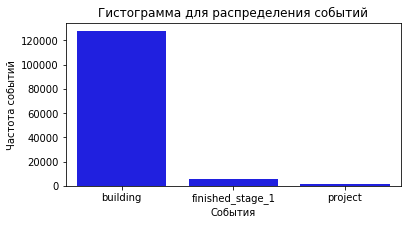

In [21]:
#построим график распределения событий
plt.figure(figsize=(6, 3))
events_grouped_barplot = sns.barplot(x='event', y='amount', color='blue',\
data=events_grouped.sort_values(by='amount', ascending=False))

events_grouped_barplot.set_title('Гистограмма для распределения событий')
events_grouped_barplot.set_xlabel('События')
events_grouped_barplot.set_ylabel('Частота событий')

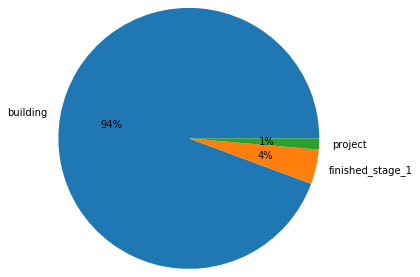

In [22]:
#построим круговую диаграмму для распределения по событиям
plt.pie(events_grouped['amount'], labels=events_grouped['event'], autopct='%.0f%%', radius=1.5)
plt.show()

*Из расчетов выше и графика видим, что 94% событий приходится на строительство объектов.* 

In [23]:
#посмотрим на распределение событий внутри целевого события finished_stage_1 
stage_1 = events_grouped.loc[2:].drop(columns='ratio').copy()

#добавим в датафрейм данные по событиям с победами
stage_1.loc[1] = ['victory', events_grouped.loc[1, 'amount'] - events_grouped.loc[2, 'amount']]

#добавим долю каждого из события в finished_stage_1
stage_1['ratio'] = round(stage_1['amount'] / events_grouped.loc[1, 'amount'], 2) 

#проверяем
display(stage_1)

,event,amount,ratio
2,project,1866,0.32
1,victory,3951,0.68


Здесь и далее под project понимается завершение 1-го уровня реализацией проекта, а под victory - завершение 1-го уровня победой над врагом.

Text(0, 0.5, 'Частота событий')

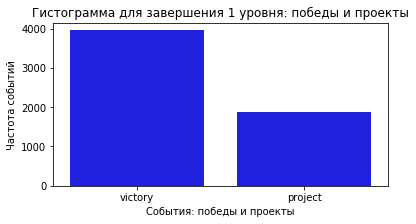

In [24]:
#построим график распределения событий
plt.figure(figsize=(6, 3))
stage_1_barplot = sns.barplot(x='event', y='amount', color='blue',\
data=stage_1.sort_values(by='amount', ascending=False))

stage_1_barplot.set_title('Гистограмма для завершения 1 уровня: победы и проекты')
stage_1_barplot.set_xlabel('События: победы и проекты')
stage_1_barplot.set_ylabel('Частота событий')

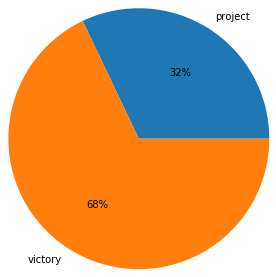

In [25]:
#построим круговую диаграмму для распределения по победам и проектам
plt.pie(stage_1['amount'], labels=stage_1['event'], autopct='%.0f%%', radius=1.5)
plt.show()

*Видим, что 1 уровень завершался победами в 2 раза больше, чем проектами.*

In [26]:
#добавим столбец только с датой и неделей в game_actions
game_actions['date'] = pd.to_datetime(game_actions['event_datetime'].dt.date)
game_actions['week'] = game_actions['event_datetime'].dt.week

#проверяем
game_actions.head(3)

,event_datetime,event,building_type,user_id,project_type,date,week
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,19
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,19
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,19


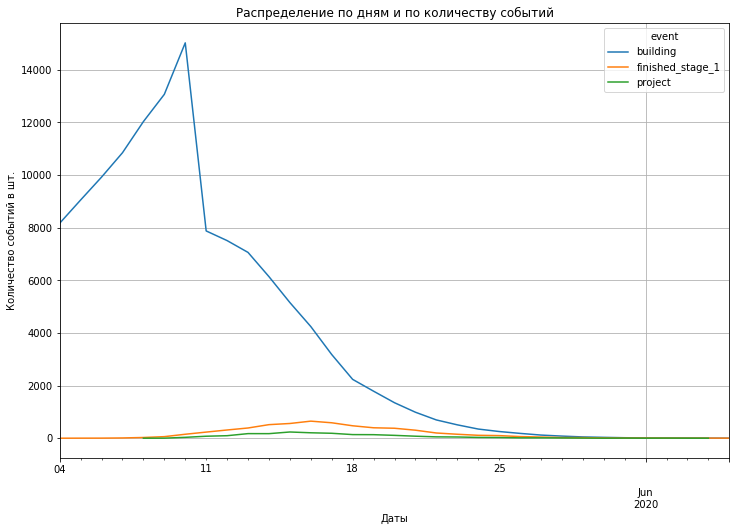

In [27]:
#строим график по дням и по количеству определенных событий
game_actions.pivot_table(index='date', columns='event', values='event_datetime', aggfunc='count').plot(figsize=(12, 8), grid=True)
plt.title('Распределение по дням и по количеству событий')
plt.ylabel('Количество событий в шт.')
plt.xlabel('Даты')
plt.show()


*1. На графике видим, что интересующее нас событие building резко начинает расти с самого первого дня. Рост продолжается в течение 6 дней, а затем начинает резко падать и к 28.05 приходит практически к нулю.*  
*2. В отношении событий finished_stage_1 и project рост и пик наступает позже. Это может быть объяснимо тем, что на завершение уровня требуется определенное время. Рост начинается с 5 дня, а пик приходится примерно на 12 день (16.05). При этом уже к 26.05 показания обоих событий находятся около 0.*  
*3.Таким образом, активность на первом уровне игры продолжается примерно 22 дня.*

#### Анализ пользователей, в том числе в контексте событий

In [28]:
#посчитаем общее количество пользователей, игравших в игру, и сколько в среднем на 1 пользователя событий приходится
total_users = len(game_actions['user_id'].unique())
event_per_user = round(events_grouped['amount'].sum() / total_users, 0)

display(f'Всего пользователей: {total_users}')
display(f"Событий на 1 пользователя: {event_per_user}")

'Всего пользователей: 13576'

'Событий на 1 пользователя: 10.0'

In [29]:
#посмотрим на количество событий, которые совершил каждый пользователь
users_grouped = game_actions.groupby('user_id', as_index=False)['event'].count().rename(columns={'event' : 'amount'})

#проверим и посмотрим топ-5
display(users_grouped.sort_values(by='amount', ascending=False).head(5))

,user_id,amount
11329,d6aca06a-cd75-4cd8-b8cd-240a3c163884,22
13550,ff841992-d93b-462e-bc6e-18c24a514f36,22
10120,bf542075-e3a2-4e79-82d8-3838e86d2a25,22
3773,45935e5d-8f50-4176-83d3-fd545bb2015f,21
7912,94844e06-0352-4048-9e62-1db7718f804c,21


In [30]:
#посмотрим на описание получившегося датасета
users_grouped.describe()

,amount
count,13576.000000
mean,9.991087
std,4.146133
min,1.000000
25%,6.000000
50%,10.000000
75%,13.000000
max,22.000000


*Видим, что среднее и медиана одинаковы, стандартное отклонение равно 4. Чтобы понять насколько оно велико и как сильно разбросаны данные, в т.ч. имеются ли там выбросы, построим боксплот.*

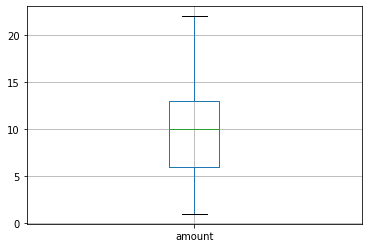

In [31]:
#строим боксплот
users_grouped.boxplot()

*Выбросов в датасете users_grouped не обнаружено. Таким образом, оснований для исключения из него пользователей совершивших какое-либо определенное количество событий не имеется.*

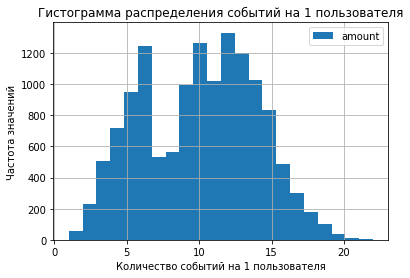

In [32]:
#изучим распределение на гистограмме
users_grouped.plot(kind='hist', y='amount', bins=22, grid=True)
plt.title('Гистограмма распределения событий на 1 пользователя')
plt.xlabel('Количество событий на 1 пользователя')
plt.ylabel('Частота значений')
plt.show()

*Видим, что минимальных (1) и максимальных значений количества событий (свыше 20) очень мало. В основном пики приходятся на 10, 6 и 12 событий.* 

In [33]:
#создадим срез, в котором будут только те данные, где есть завершенный уровень 1
slice_for_finished = game_actions.query('event == "finished_stage_1"').copy()

#выведем уникальных пользователей, завершивших уровень 1
print('Количество пользователей, завершивших 1 уровень:',\
      len(slice_for_finished['user_id'].unique()))

#выведем долю пользователей, завершивших 1 уровень, от общего числа уникальных пользователей
print('Доля пользователей, завершивших 1 уровень, от общего числа уникальных пользователей:',\
      round(len(slice_for_finished['user_id'].unique()) / total_users, 2))

Количество пользователей, завершивших 1 уровень: 5817
Доля пользователей, завершивших 1 уровень, от общего числа уникальных пользователей: 0.43


*43 % пользователей, пришедших в игру, заканчивали первый уровень.*

In [34]:
#посчитаем dau и wau
dau_total = int(game_actions.groupby('date').agg({'user_id': 'nunique'}).mean())
wau_total = int(game_actions.groupby('week').agg({'user_id': 'nunique'}).mean())


#посчитаем sticky factor
sticky_factor = round(dau_total / wau_total, 2)

#выведем на экран результаты
print('DAU:', dau_total)
print('WAU:', wau_total)
print('Sticky factor:', sticky_factor)

DAU: 2884
WAU: 6120
Sticky factor: 0.47


*В принципе, sticky factor демонстрирует неплохой уровень - 47%, т.е. пользователи возвращаются к игре (в среднем для игр этот  показатель составляет 18%). Но в целях более высокой точности, этот показатель лучше контролировать в разные промежутки времени, а нам представлен только 1 месяц.*

#### Схема монетизации

**Первый вариант**

In [35]:
#сохраним в переменную доход за один показ рекламы
revenue_per_show = 0.07

#посчитаем доход для всех построек в игре
buildings_revenue = revenue_per_show * events_grouped.loc[0, 'amount']

#узнаем совокупные расходы на привлечение
total_costs = ad_costs['cost'].sum()

#посчитаем ROMI
ROMI = buildings_revenue / total_costs

#выведем на экран
display(f'Стоимость одного показа рекламы: {revenue_per_show}.')
display(f'Доход со всех построек в игре: {buildings_revenue}.')
display(f'Расходы на привлечение пользователей: {total_costs}.')
display('ROMI: {:.1%}'.format(ROMI))

'Стоимость одного показа рекламы: 0.07.'

'Доход со всех построек в игре: 8956.92.'

'Расходы на привлечение пользователей: 7603.57.'

'ROMI: 117.8%'

*1. Видим, что если размещать рекламу на всех постройках сразу, то расходы на привлечение окупятся. Плюс, сверх окупаемости имеется прибыль в размере 17.8%.*  
*2. Вместе с тем, при размещении рекламы с самого начала есть риски, что пользователи будут отказываться от игры из-за недовольства рекламой.*  
*3. Поэтому лучше размещать рекламу, когда пользователь станет более лояльным к игре. Далее попробуем расчитать монетизацию с учетом данного обстоятельства.* 

In [36]:
#посчитаем доход для всех построек за минусом первой постройки каждого пользователя
revenue_without_first_building = (events_grouped.loc[0, 'amount'] - total_users) * revenue_per_show

#посчитаем ROMI
ROMI_without_first_building = revenue_without_first_building / total_costs

#выведем на экран
display(f'Доход с построек за минусом первой постройки в игре: {round(revenue_without_first_building, 2)}.')
display(f'Расходы на привлечение пользователей: {total_costs}.')
display('ROMI: {:.1%}'.format(ROMI_without_first_building))

'Доход с построек за минусом первой постройки в игре: 8006.6.'

'Расходы на привлечение пользователей: 7603.57.'

'ROMI: 105.3%'

*Предлагается вариант, при котором реклама будет показываться не сразу, а начиная со второй постройки. В таком случае доход составит 8006.6, а ROMI 5.3%.*

**Второй вариант**

*Предлагается рассмотреть возможность включать рекламу не только в событии - постройка объектов, а во всех событиях: building, finished_stage_1, project.* 

In [37]:
#посчитаем доход для всех событий, за исключением 1-й постройки
revenue_for_all_events = (events_grouped['amount'].sum() - total_users) * revenue_per_show

#посчитаем ROMI с учетом всех событий
ROMI_for_all_events = revenue_for_all_events / total_costs

#выведем на экран
display(f'Доход со всех событий: {round(revenue_for_all_events, 2)}.')
display(f'Расходы на привлечение пользователей: {total_costs}.')
display('ROMI для всех событий: {:.1%}'.format(ROMI_for_all_events))

'Доход со всех событий: 8544.41.'

'Расходы на привлечение пользователей: 7603.57.'

'ROMI для всех событий: 112.4%'

*Видим, что если реклама будет предусмотрена для всех событий в игре, то к окупаемости добавляется запас в 12%. Доход составит 8544.41 при расходе 7603.57. Кроме того, демонстрация рекламы в этих событиях не будет отвлекать пользователя, т.к. уровень уже практически завершен.*

#### Анализ построек

In [38]:
#посмотрим на количество по каждому из зданий
buildings_grouped = game_actions.groupby('building_type', as_index=False)['user_id'].count().rename(columns={'user_id' : 'amount'})

#добавим столбец с расчетом доли 
buildings_grouped['ratio'] = round(buildings_grouped['amount'] / buildings_grouped['amount'].sum(), 3)

#проверяем
display(buildings_grouped.sort_values(by='amount', ascending=False))

,building_type,amount,ratio
2,spaceport,59325,0.464
0,assembly_shop,54494,0.426
1,research_center,14137,0.110


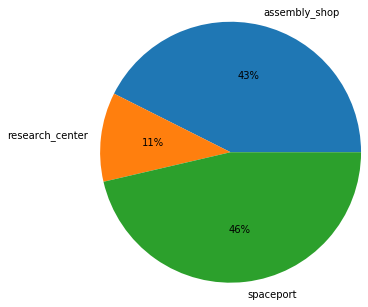

In [39]:
#построим круговую диаграмму для распределения по постройкам
plt.pie(buildings_grouped['amount'], labels=buildings_grouped['building_type'], autopct='%.0f%%', radius=1.5)
plt.show()

*После изучения построек видим, что среди них есть явный отстающий - reseach_center, с отставанием почти в 4 раза. Если данная постройка яляется финальной для завершения проекта по разработке орбитальной сборки спутников, то тогда отставание объяснимо, т.к. немного игроков завершает первый уровень созданием проекта.*  
*Но может быть есть какие-то проблемы с данной постройкой, например, игроки не всегда могут ее построить из-за технических причин или требуется много ресурсов на нее/созданы иные сложные условия, что нетипично для 1 уровня.* 

#### Анализ расходов на привлечение

In [40]:
#посмотрим как источники распределены по расходам
ad_cost_grouped = ad_costs.groupby('source', as_index=False)['cost'].sum().sort_values(by='cost', ascending=False)
display(ad_cost_grouped)

,source,cost
2,yandex_direct,2233.11
1,instagram_new_adverts,2161.45
0,facebook_ads,2140.90
3,youtube_channel_reklama,1068.11


In [41]:
#посмотрим сколько приходило пользователей из каждого источника
user_source_grouped = user_source.groupby('source')['user_id'].nunique().\
to_frame(name='amount').reset_index().sort_values(by='amount', ascending=False)
display(user_source_grouped)

,source,amount
2,yandex_direct,4817
1,instagram_new_adverts,3347
0,facebook_ads,2726
3,youtube_channel_reklama,2686


In [42]:
#посчитаем эффективность расходов на привлечение 1 пользователя
#для этого объединим датафреймы и добавим столбец с отношением
merged_costs_sources = pd.merge(ad_cost_grouped, user_source_grouped, how="inner", on='source')
merged_costs_sources['cost_per_user'] = round(merged_costs_sources['cost'] / merged_costs_sources['amount'], 2)
display(merged_costs_sources.sort_values(by='cost_per_user', ascending=False))

,source,cost,amount,cost_per_user
2,facebook_ads,2140.90,2726,0.79
1,instagram_new_adverts,2161.45,3347,0.65
0,yandex_direct,2233.11,4817,0.46
3,youtube_channel_reklama,1068.11,2686,0.40


*Эффективнее всего за изучаемый отрезок времени показало себя привлечение из youtube - 0.4 на одного пользователя. Но с youtube приходит и меньше всего клиентов - 2686. С точки зрения баланса (расходы - количество клиентов) лучше всех показало привлечение из yandex. Больше всех привлечено - 4817, при этом расходы на одного пользователя немногим больше, чем у youtube - 0.46. Самый неэффективый - facebook, т.к. расходы на пользователя составили 0.79 (дороже всего), а привлечено чуть больше, чем у youtube - 2726, т.е. на 40 клиентов.*

### Выводы к шагу 2

1. В представленном датасете 135 639 событий, которые были совершено 13 576 пользователями. Т.е. на одного пользователя - примерно 10 событий. 43 % пользователей, пришедших в игру, заканчивали первый уровень. 
2. 94% событий приходится на строительство объектов. Вероятно строительство объекта – ключевое событие игры, без которого невозможно завершение 1-го уровня.
3. 1-й уровень завершался победами в 2 раза чаще, чем проектами (68% приходится на победы и 32% на проекты). Таким образом, заметен перекос в сторону побед, т.е. необходимо предпринять какие-либо действия для того, чтобы заинтересовать пользователей строить, а не воевать в основном. Возможно, следует причины в сложном алгоритме постройки, требовательности к ресурсам или технических проблемах. Так же пользователей можно заинтересовать в сторону развития путем предложения каких-нибудь игровых бонусов и т.д. 
4. Рост пользовательской активности и строительства объектов приходится на первые шесть дней, а затем начинает резко снижаться. Это обусловлено тем, что в первую неделю шло активное привлечение пользователей из рекламных ресурсов.
5. В отношении событий finished_stage_1 и project рост и пик наступают позже. Это может быть обусловлено тем, что на завершение уровня требуется определенное время. Рост начинается с 5 дня, а пик приходится примерно на 12 день. 
6. Общая игровая активность на 1 уровне составляет примерно 22 дня. После этого какая-либо заметная активность отсутствует.
7. Расчитанный sticky factor демонстрирует неплохой уровень - 47%, т.е. пользователи возвращаются к игре (в среднем для игр этот показатель составляет 18%). Но т.к. данные получены только за месяц, то лучше исследовать и другие периоды в целях более высокой точности. DAU составил - 2 884, WAU составил - 6 120.
8. В части монетизации возможны следующие варианты:  
А) Если размещать рекламу на всех постройках сразу, то расходы на привлечение окупятся, плюс, сверх окупаемости будет прибыль в размере 17.8% (ROMI). Доход со всех построек в игре: 8 956.92, а расходы на привлечение - 7 603.57. Но при размещении рекламы с самого первого дня игры есть риски, что пользователи будут отказываться от нее из-за недовольства рекламой.  
В) С точки зрения интересов пользователей, лучше размещать рекламу, когда пользователь станет более лояльным к игре. Предлагается вариант, при котором реклама будет показываться не сразу, а начиная со второй постройки. В таком случае доход составит 8006.6, а ROMI 5.3%. Если показывать рекламу с третьей и далее постройки, то расходы на привлечение уже не окупятся.  
С) Предложен вариант по включению рекламы не только в событие - постройка объектов, но и в другие события: finished_stage_1, project. В случае запуска рекламы для всех событий в игре (за минусом 1-й постройки) к окупаемости добавляется запас в 12%. Доход составит 8544.41 при расходе 7603.57. Кроме того, демонстрация рекламы в этих событиях не будет отвлекать пользователя, т.к. уровень уже практически завершен.
9. При изучении построек выявили, что reseach_center строится почти в 4 раза меньше, чем остальные два типа объектов. Если данная постройка яляется финальной для завершения проекта по разработке орбитальной сборки спутников, то тогда отставание объяснимо, т.к. немного игроков завершает первый уровень созданием проекта. Но могут также быть есть какие-то проблемы с данной постройкой, например, игроки не всегда могут ее построить из-за технических причин или требуется много ресурсов на нее/созданы иные сложные условия для ее постройки, что нетипично для 1 уровня игры.
10. Эффективнее всего за изучаемый отрезок времени показало себя привлечение из youtube - 0.4 на одного пользователя. Но с youtube приходит и меньше всего клиентов - 2686. С точки зрения баланса (расходы - количество клиентов) лучше всех показало привлечение из yandex. Больше всех привлечено - 4817, при этом расходы на одного пользователя немногим больше, чем у youtube - 0.46. Самый неэффективый - facebook, т.к. расходы на пользователя составили 0.79 (дороже всего), а привлечено чуть больше, чем у youtube - 2726, т.е. на 40 клиентов. Следует обратить на это внимание и при необходимости следует скорректировать настройки рекламной кампании.

<a id="hypothesis_checking"></a>
## Проверка гипотез

### Проверка и формулирование гипотез

**Проверка гипотезы о различии времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.**

*Формулируем гипотезы:  
H0 (нулевая гипотеза) – среднее время прохождения уровня пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, не различается.*  

*Н1 (альтернативная гипотеза) – среднее время прохождения уровня пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком различается.*

In [43]:
#создаем списки "имен" пользователей для закончивших уровень 1, завершивших уровень проектом и победой
finished_users_id = list(slice_for_finished['user_id'].unique())

project_users_id = list(game_actions.query('event == "project"')['user_id'].unique())

victory_users_id = []
for element in finished_users_id:
    if element not in project_users_id:
        victory_users_id.append(element)

In [44]:
#создаем датасет с пользователями, закончившими победой
victory_events = game_actions.query('user_id in@victory_users_id').copy()

#группируем по пользователям и находим макс. и мин. время
victory_events_grouped = victory_events.groupby('user_id').agg({'event_datetime' : ['min', 'max']})

#убираем мультииндексы
victory_events_grouped.columns = victory_events_grouped.columns.droplevel()

#считаем время на прохождение 1 уровня в секундах
victory_events_grouped['time_spent'] = (victory_events_grouped['max'] - victory_events_grouped['min']).dt.seconds

#считаем среднее время
print('Среднее время для 1 уровня при победе врагов:', int(victory_events_grouped['time_spent'].mean()), 'сек.')

Среднее время для 1 уровня при победе врагов: 43050 сек.


In [45]:
#создаем датасет с пользователями, закончившими проектом
project_events = game_actions.query('user_id in@project_users_id').copy()

#группируем по пользователям и находим макс. и мин. время
project_events_grouped = project_events.groupby('user_id').agg({'event_datetime' : ['min', 'max']})

#убираем мультииндексы
project_events_grouped.columns = project_events_grouped.columns.droplevel()

#считаем время на прохождение 1 уровня в секундах
project_events_grouped['time_spent'] = (project_events_grouped['max'] - project_events_grouped['min']).dt.seconds

#считаем среднее время
print('Среднее время для 1 уровня при реализации проекта:', int(project_events_grouped['time_spent'].mean()), 'сек.')

Среднее время для 1 уровня при реализации проекта: 42843 сек.


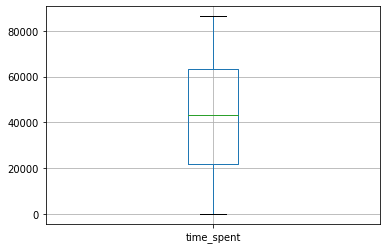

In [46]:
#построим boxplot для victory_events_grouped в целях проверки на выбросы
victory_events_grouped.boxplot()

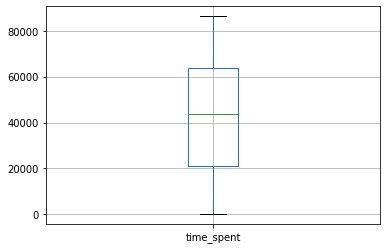

In [47]:
#построим boxplot для project_events_grouped в целях проверки на выбросы
project_events_grouped.boxplot()

*Выбросов не обнаружено, значит будем использовать ttest для проверки стат. гипотез*

In [48]:
#смотрим на дисперсию выборок
var_victory_time_spent = np.var(victory_events_grouped['time_spent'], ddof = 1)
display(var_victory_time_spent)

603125705.651076

In [49]:
#смотрим на дисперсию выборок
var_project_time_spent = np.var(project_events_grouped['time_spent'], ddof = 1)
display(var_project_time_spent)

608844266.6701481

In [50]:
#используем метод для сравнения средних значений
alpha = 0.05
times_compare = st.ttest_ind(victory_events_grouped['time_spent'], project_events_grouped['time_spent'], equal_var=False)
print('p-значение:', times_compare.pvalue)

if times_compare.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.7654132379987643
Не получилось отвергнуть нулевую гипотезу


*Для проверки использовалось значение pvalue. Уровень значимости выбран в размере 0.05.*

*Параметр False в equal_var выбран потому, что дисперсии выборок не равны.*

*По итогам тестирования выявили, что нулевую гипотезу отвергнуть не получилось. Таким образом, хотя фактическое среднее время прохождения уровня пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, отличается, такое значение могло быть получено случайно с вероятностью 77%.*

**Проверка гипотезы о различии времени, проведенного в игре, между пользователями, которые закончили 1-й уровень, и пользователями, которые не завершили его.**

*Формулируем гипотезы:  
H0 (нулевая гипотеза) – среднее время, проведенное в игре, пользователями, которые закончили 1-й уровень, и пользователями, которые не завершили его, не различается.*  

*Н1 (альтернативная гипотеза) – среднее время, проведенное в игре, пользователями, которые закончили 1-й уровень, и пользователями, которые не завершили его, различается.*

In [51]:
#создадим списки "имен" (id) пользователей для тех, кто построил здание
users_id_buildings = list(game_actions.query('event != "project" or event != "finished_stage_1"')['user_id'].unique())

#из списка выше уберем id тех, кто завершил 1 уровень
not_finished_users_id = []
for element in users_id_buildings:
    if element not in finished_users_id or element not in project_users_id:
        not_finished_users_id.append(element)

In [52]:
#создаем датасет с пользователями, не завершившими 1 уровень
not_finished_events = game_actions.query('user_id in@not_finished_users_id').copy()

#группируем по пользователям и находим макс. и мин. время
not_finished_events_grouped = not_finished_events.groupby('user_id').agg({'event_datetime' : ['min', 'max']})

#убираем мультииндексы
not_finished_events_grouped.columns = not_finished_events_grouped.columns.droplevel()

#считаем время тех, кто не прошел 1 уровень в секундах
not_finished_events_grouped['time_spent'] = (not_finished_events_grouped['max'] - not_finished_events_grouped['min']).dt.seconds

#считаем среднее время
print('Среднее время для тех, кто не завершил 1 уровень:', int(not_finished_events_grouped['time_spent'].mean()), 'сек.')

Среднее время для тех, кто не завершил 1 уровень: 43304 сек.


In [53]:
#создаем датасет с пользователями, завершившими 1 уровень
finished_events = game_actions.query('user_id in@finished_users_id').copy()

#группируем по пользователям и находим макс. и мин. время тех, кто завершил уровень 1
finished_events_grouped = finished_events.groupby('user_id').agg({'event_datetime' : ['min', 'max']})

#убираем мультииндексы
finished_events_grouped.columns = finished_events_grouped.columns.droplevel()

#считаем время тех, кто прошел 1 уровень в секундах
finished_events_grouped['time_spent'] = (finished_events_grouped['max'] - finished_events_grouped['min']).dt.seconds

#считаем среднее время тех, кто прошел уровень 1
print('Среднее время для тех, кто завершил 1 уровень:', int(finished_events_grouped['time_spent'].mean()), 'сек.')

Среднее время для тех, кто завершил 1 уровень: 42984 сек.


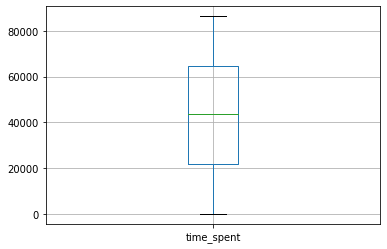

In [54]:
#построим boxplot для not_finished_events_grouped в целях проверки на выбросы
not_finished_events_grouped.boxplot()

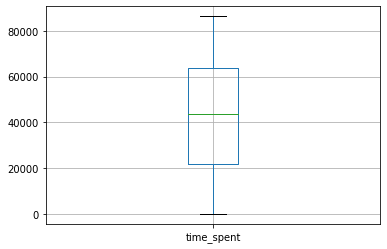

In [55]:
#построим boxplot для finished_events_grouped в целях проверки на выбросы
finished_events_grouped.boxplot()

*Выбросов не обнаружено, значит будем использовать ttest для проверки стат. гипотез*

In [56]:
#смотрим на дисперсию выборок
var_not_finished_time_spent = np.var(not_finished_events_grouped['time_spent'], ddof = 1)
display(var_not_finished_time_spent)

620099528.7673608

In [57]:
#смотрим на дисперсию выборок
var_finished_time_spent = np.var(finished_events_grouped['time_spent'], ddof = 1)
display(var_finished_time_spent)

604865052.4702407

In [58]:
#используем метод для сравнения средних значений
alpha = 0.05
times_compare_fin_and_not_fin = st.ttest_ind(not_finished_events_grouped['time_spent'], finished_events_grouped['time_spent'], equal_var=False)
print('p-значение:', times_compare_fin_and_not_fin.pvalue)

if times_compare_fin_and_not_fin.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.4194801852900941
Не получилось отвергнуть нулевую гипотезу


*Для проверки использовалось значение pvalue.*

*Параметр False в equal_var выбран потому, что дисперсии выборок не равны.*

*По итогам тестирования выявили, что нулевую гипотезу отвергнуть не получилось. Таким образом, хотя фактическое среднее время в игре пользователей, которые не заканчивают 1-й уровень, и пользователей, которые заканчивают 1-й уровень, отличается, такое значение могло быть получено случайно с вероятностью 42%.*

### Выводы к шагу 3

*Проверили две статистические гипотезы по итогам проверки было выявлено, что вероятно:*  
*1) среднее время прохождения уровня пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, не отличается, не смотря на фактическое различие -  42843 сек. у тех, кто завершил проект и 43050 сек. у тех, кто победил врагов;*  
*2) среднее время в игре пользователей, которые не заканчивают 1-й уровень, и пользователей, которые заканчивают 1-й уровень, не отличается, не смотря на фактическое различие - 43304 сек. у тех, кто не завершил 1-й уровень и 42984 сек. у тех, кто завершил его;*


<a id="summary"></a>
## Общие выводы

*В части монетизации возможны следующие варианты:*  
1. Если размещать рекламу на всех постройках сразу, то расходы на привлечение окупятся, плюс, сверх окупаемости будет прибыль в размере 17.8% (ROMI). Доход со всех построек в игре: 8 956.92, при расходе на привлечение - 7 603.57. Но при размещении рекламы с самого первого дня игры есть риски, что пользователи будут отказываться от нее из-за недовольства рекламой.  
2. С точки зрения интересов пользователей, лучше размещать рекламу, когда пользователь станет более лояльным к игре. Предложен  вариант, при котором реклама будет показываться не сразу, а начиная со второй постройки. В таком случае доход составит 8006.6, а ROMI 5.3%. Если показывать рекламу с третьей и далее постройки, то расходы на привлечение уже не окупятся.  
3. Дополнительно предложен вариант по включению рекламы не только в событие - постройка объектов, но и в другие события: finished_stage_1, project. В случае запуска рекламы для всех событий в игре (за минусом 1-й постройки) к окупаемости добавляется запас в 12%. Доход составит 8544.41 при расходе 7603.57. Кроме того, демонстрация рекламы в этих событиях не будет отвлекать пользователя, т.к. уровень уже практически завершен.

*Иные, выводы и наблюдения, сделанные в ходе исследования:*
1. Во время исследования был найден 1 дубликат в датасете game_actions, который был удален.
2. 43 % пользователей, пришедших в игру, заканчивали первый уровень. 
3. В среднем на 1 пользователя приходилось 10 событий: всего событий 135 639, а пользователей 13 576. 
4. 94% событий приходится на строительство объектов. Вероятно, строительство объекта – ключевое событие игры, без которого невозможно завершение 1-го уровня и прохождение игры.
5. 1-й уровень завершался победами в 2 раза чаще, чем проектами (68% приходится на победы и 32% на проекты). Таким образом, заметен перекос в сторону побед, т.е. необходимо предпринять какие-либо действия для того, чтобы заинтересовать пользователей строить, а не воевать. Возможно, причины следует искать в сложном алгоритме постройки, требовательности к ресурсам или технических проблемах. Так же пользователей можно заинтересовать на завершение игры реализацией проекта путем предложения каких-нибудь игровых бонусов и т.д. 
6. Рост пользовательской активности и строительства объектов приходится на первые шесть дней, а затем начинает резко снижаться. Это обусловлено тем, что в первую неделю шло активное привлечение пользователей из рекламных ресурсов.
7. В отношении событий finished_stage_1 и project рост и пик наступают позже. Это может быть обусловлено тем, что на завершение уровня требуется определенное время. Рост начинается с 5 дня, а пик приходится примерно на 12 день. 
8. Общая игровая активность на 1 уровне составляет примерно 22 дня. После этого какая-либо заметная активность отсутствует.
9. Расчитанный sticky factor демонстрирует неплохой уровень - 47%, т.е. пользователи возвращаются к игре (в среднем для игр этот показатель составляет 18%). Но т.к. данные получены только за месяц, то лучше исследовать и другие периоды в целях более высокой точности. DAU составил - 2 884, WAU составил - 6 120.
10. При изучении построек выявили, что reseach_center строится почти в 4 раза меньше, чем остальные два типа объектов. Если данная постройка яляется финальной для завершения проекта по разработке орбитальной сборки спутников, то тогда отставание объяснимо, т.к. немного игроков завершает первый уровень созданием проекта. Но могут также быть какие-то проблемы с данной постройкой, например, игроки не всегда могут ее построить из-за технических причин или требуется много ресурсов на нее/созданы иные сложные условия для ее постройки, что нетипично для 1 уровня игры.
11. Эффективнее всего за изучаемый отрезок времени показало себя привлечение из youtube - 0.4 на одного пользователя. Но с youtube приходит и меньше всего клиентов - 2686. С точки зрения баланса (расходы - количество клиентов) лучше всех показало привлечение из yandex. Больше всех привлечено - 4817, при этом расходы на одного пользователя немногим больше, чем у youtube - 0.46. Самый неэффективый - facebook, т.к. расходы на пользователя составили 0.79 (дороже всего), а привлечено чуть больше, чем у youtube - 2726, т.е. на 40 клиентов. Следует обратить на это внимание и при необходимости следует скорректировать настройки рекламной кампании.
12. Проверили две статистические гипотезы по итогам проверки было выявлено, что вероятно:  
1) среднее время прохождения уровня пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, не отличается, не смотря на фактическое различие -  42843 сек. у тех, кто завершил проект и 43050 сек. у тех, кто победил врагов;  
2) среднее время в игре пользователей, которые не заканчивают 1-й уровень, и пользователей, которые заканчивают 1-й уровень, не отличается, не смотря на фактическое различие - 43304 сек. у тех, кто не завершил 1-й уровень и 42984 сек. у тех, кто завершил его;
13. Полученные результаты проверки гипотез могут свидетельствовать о том, что: а) пользователи пробуют игру из любопытства и хотят быстрее пройти уровень, б) либо процесс строительства объектов носит сложный/непонятный характер или есть технические препятствия в реализации построек/прохождения игры; в) возможно игроки были введены в заблуждение жанром игры - думали, что это экшн, а это на стратегию больше похоже.
 